# Importing necessary packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generating data 


## Function to be fitted

In [59]:
def function(x):
  y = x*np.sin(.5*x*np.sin(.5*x*np.cos(x)))
  return y
vf = np.vectorize(function)

Plot the function

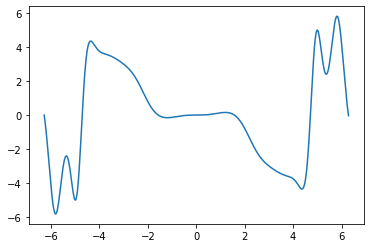

In [60]:
init = -2*np.pi
endval = 2*np.pi
step = .01
x = np.arange(init,endval+step,step)
plt.plot(x,vf(x))